## Homework 1.3.1 - Pythagorean Problem

Consider three bodies of mass, $m1 = 3$, $m_2 = 4$, and $m_3 = 5$, located coordinate $(x, y)$ at $(1, 3)$, $(-2, -1)$ and $(1, -1)$ respectively. All are initially at rest. The interaction between particles are given by Newton's second law of motion and Newton's gravitational law:

$${{\vec F}_i} = {m_i}{a_i} =  - G\sum\limits_{i \ne j} {{m_i}{m_j}\frac{{{{\vec r}_i} - {{\vec r}_j}}}{{{{\left| {{{\vec r}_i} - {{\vec r}_j}} \right|}^3}}}} $$

Using $G = 4 \pi^2$, investigate the motion of the particles from $t = 0$ to $t = 10$

In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
import matplotlib.animation as animation

We have $$ a_i = - G\sum\limits_{i \ne j} {{m_j}\frac{{{{\vec r}_i} - {{\vec r}_j}}}{{{{\left| {{{\vec r}_i} - {{\vec r}_j}} \right|}^3}}}}$$
and ,
$$  \frac{d}{dt}\begin{bmatrix} x_1 \\ y_1 \\ x_2 \\ y_2\\ x_3\\ y_3 \\ \dot{x}_1 \\ \dot{y}_1\\ \dot{x}_2 \\ \dot{y}_2\\ \dot{x}_3 \\ \dot{y}_3 \end{bmatrix} = \begin{bmatrix}  \dot{x}_1 \\ \dot{y}_1\\ \dot{x}_2 \\ \dot{y}_2\\ \dot{x}_3 \\ \dot{y}_3 \\a_{1x} \\ a_{1y} \\ a_{2x} \\ a_{2y}\\ a_{3x}\\ a_{3y} \end{bmatrix}\begin{matrix} 0\\1\\2\\3\\4\\5\\6\\7\\8\\9\\10\\11\end{matrix}$$

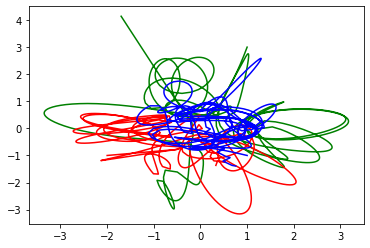

In [14]:
y0 = np.array([1,3,-2,-1,1,-1,0,0,0,0,0,0])
m = np.array([3,4,5])
G=4*np.pi**2
def a(i,y):
    res = np.array([0,0])
    for j in range(3):
        if i != j:
            difr = np.array([y[2*i],y[2*i+1]]) - np.array([y[2*j],y[2*j+1]])
            res =res+ m[j]*( (difr)/(difr[0]**2+difr[1]**2)**(3/2) )
    return -G*res
def rhs(y,t):
    return np.array([y[6],y[7],y[8],y[9],y[10],y[11],a(0,y)[0],a(0,y)[1],a(1,y)[0],a(1,y)[1],a(2,y)[0],a(2,y)[1]])
t = np.arange(0,10,0.01)
ans = odeint(rhs,y0,t)
plt.plot(ans[:,0],ans[:,1],'g')
plt.plot(ans[:,2],ans[:,3], 'r')
plt.plot(ans[:,4],ans[:,5], 'b')

<function matplotlib.pyplot.show(close=None, block=None)>

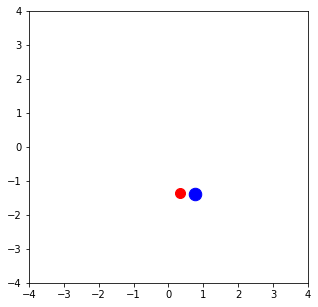

In [15]:
fig, ax = plt.subplots(figsize=(5, 5))
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
m1, = ax.plot([], [], 'g.', markersize=15)
m2, = ax.plot([], [], 'r.', markersize=20)
m3, = ax.plot([], [], 'b.', markersize=25)


def animate(i):
    m1.set_data(ans[i,0],ans[i,1])
    m2.set_data(ans[i,2],ans[i,3])
    m3.set_data(ans[i,4],ans[i,5])
    return m1,m2,m3

anim = animation.FuncAnimation(fig, animate, frames=1000, interval=10, repeat=False)
anim.save('PythagoreanProblem.mp4', fps = 100)
plt.show

___
## Homework 1.3.2 - Double Pendulum
![alt text](images/double-pendulum.png "Double Pendulum")

The equations of motion for the double pendulum are given by [from http://scienceworld.wolfram.com/physics/DoublePendulum.html]:

$$({m_1} + {m_2}){l_1}{{\ddot \theta }_1} + {m_2}{l_2}{{\ddot \theta }_2}\cos ({\theta _1} - {\theta _2}) + {m_2}{l_2}{({{\dot \theta }_2})^2}\sin ({\theta _1} - {\theta _2}) + ({m_1} + {m_2})g\sin {\theta _1} = 0$$

$${m_2}{l_2}{{\ddot \theta }_2} + {m_2}{l_1}{{\ddot \theta }_1}\cos ({\theta _1} - {\theta _2}) - {m_2}{l_1}{({{\dot \theta }_1})^2}\sin ({\theta _1} - {\theta _2}) + {m_2}g\sin {\theta _2} = 0$$

Given that $l_1 = 1$, $l_2 = 2$, $m_1 = 2$, $m_2 = 1$ and $g = 9.8$ $m/s^2$

The initial conditions at $t = 0$ are:

${{\theta }_1}(0) = 1.5$

${{\dot \theta }_1}(0) = 0$

${{\theta }_2}(0) = 3.0$

${{\dot \theta }_2}(0) = 0.0$

Write a program to plots the positions of the mass $m_2$ in $x-y$ coordinate over the time interval $0 \le t \le T\; s$. Where $T$ are:

a) 10

b) 100

We have $$ \frac{d}{dt}\begin{bmatrix}\theta_1\\ \theta_2\\ \dot{\theta_1}\\  \dot{\theta_2}\end{bmatrix} = \begin{bmatrix} \dot{\theta_1}\\  \dot{\theta_2} \\ \ddot{\theta_1} \\ \ddot{\theta_2}\end{bmatrix}$$

### scratch

\begin{align}
 0&= {m_2}{l_2}{{\ddot \theta }_2} + {m_2}{l_1}{{\ddot \theta }_1}\cos ({\theta _1} - {\theta _2}) - {m_2}{l_1}{({{\dot \theta }_1})^2}\sin ({\theta _1} - {\theta _2}) + {m_2}g\sin {\theta _2}\\
{m_2}{l_2}{{\ddot \theta }_2} &= - {m_2}{l_1}{{\ddot \theta }_1}\cos ({\theta _1} - {\theta _2}) + {m_2}{l_1}{({{\dot \theta }_1})^2}\sin ({\theta _1} - {\theta _2}) - {m_2}g\sin {\theta _2} \\
{m_2}{l_2}{{\ddot \theta }_2} &= - {m_2}{l_1}{{\ddot \theta }_1}\cos ({\theta _1} - {\theta _2})+ \text{some junk}_1
\end{align}

then, \begin{align}
({m_1} + {m_2}){l_1}{{\ddot \theta }_1} + {m_2}{l_2}{{\ddot \theta }_2}\cos ({\theta _1} - {\theta _2}) + {m_2}{l_2}{({{\dot \theta }_2})^2}\sin ({\theta _1} - {\theta _2}) + ({m_1} + {m_2})g\sin {\theta _1} = 0 \\
({m_1} + {m_2}){l_1}{{\ddot \theta }_1} + {m_2}{l_2}{{\ddot \theta }_2}\cos ({\theta _1} - {\theta _2})  &= - {m_2}{l_2}{({{\dot \theta }_2})^2}\sin ({\theta _1} - {\theta _2}) - ({m_1} + {m_2})g\sin {\theta _1} \\
({m_1} + {m_2}){l_1}{{\ddot \theta }_1} + {m_2}{l_2}{{\ddot \theta }_2}\cos ({\theta _1} - {\theta _2})  &= \text{some junk}_2\\
({m_1} + {m_2}){l_1}{{\ddot \theta }_1} + (- {m_2}{l_1}{{\ddot \theta }_1}\cos ({\theta _1} - {\theta _2})+ \text{some junk}_1)(\cos ({\theta _1} - {\theta _2}))  &= \text{some junk}_2\\
({m_1} + {m_2}){l_1}{{\ddot \theta }_1} + (- {m_2}{l_1}{{\ddot \theta }_1}\cos^2 ({\theta _1} - {\theta _2})+ (\cos ({\theta _1} - {\theta _2}))\text{some junk}_1)  &= \text{some junk}_2\\
({m_1} + {m_2}){l_1}{{\ddot \theta }_1} - {m_2}{l_1}{{\ddot \theta }_1}\cos^2 ({\theta _1} - {\theta _2})  &= \text{some junk}_2 - \cos ({\theta _1} - {\theta _2})\text{some junk}_1\\
{{\ddot \theta }_1}(({m_1} + {m_2}){l_1} - {m_2}{l_1}\cos^2 ({\theta _1} - {\theta _2})) &= \text{some junk}_2 - \cos ({\theta _1} - {\theta _2})\text{some junk}_1\\
{{\ddot \theta }_1}(\text{some junk}_3) &= \text{some junk}_2 - \cos ({\theta _1} - {\theta _2})\text{some junk}_1\\
\end{align}
Ultimately, $${{\ddot \theta }_1} = \frac{\text{some junk}_2 - \cos ({\theta _1} - {\theta _2})\text{some junk}_1}{\text{some junk}_3}\\
$$ and $${{\ddot \theta }_2} = \frac{ -{m_2}{l_1}{{\ddot \theta }_1}\cos ({\theta _1} - {\theta _2})+ \text{some junk}_1 }{{m_2}{l_2}}$$
where $$\text{some junk}_1 = {m_2}{l_1}{({{\dot \theta }_1})^2}\sin ({\theta _1} - {\theta _2}) - {m_2}g\sin {\theta _2}$$
$$\text{some junk}_2 = - {m_2}{l_2}{({{\dot \theta }_2})^2}\sin ({\theta _1} - {\theta _2}) - ({m_1} + {m_2})g\sin {\theta _1} $$
$$\text{some junk}_3 = ({m_1} + {m_2}){l_1} - {m_2}{l_1}\cos^2 ({\theta _1} - {\theta _2})$$

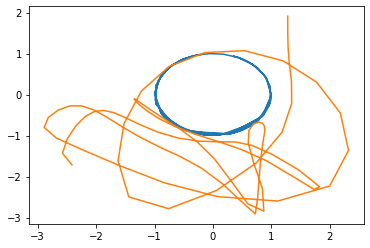

In [7]:
y0 = np.array([1.5,3,0,0])
l1,l2,m1,m2,g=1,2,2,1,9.8
T=10
def rhs(y,t):
    junk1 = m2*l1*y[2]**2*np.sin(y[0]-y[1]) -m2*g*np.sin(y[1])
    junk2 = -m2*l2*y[3]**2*np.sin(y[0]-y[1]) - (m1+m2)*g*np.sin(y[0])
    junk3 = (m1+m2)*l1 - m2*l1*np.cos(y[0]-y[1])**2
    angacc1 = (junk2 - np.cos(y[0]-y[1]) * junk1)/junk3
    angacc2 = (-m2*l1*angacc1*np.cos(y[0]-y[1])+junk1)/(m2*l2)
    return np.array([y[2],y[3],angacc1,angacc2])
t = np.arange(0,T,0.1)
ans = odeint(rhs,y0,t)
plt.plot(l1*np.sin(ans[:,0]), -l1*np.cos(ans[:,0]))
plt.plot(l2*np.sin(ans[:,1])+l1*np.sin(ans[:,0]), -l2*np.cos(ans[:,1])-l1*np.cos(ans[:,0]))

<function matplotlib.pyplot.show(close=None, block=None)>

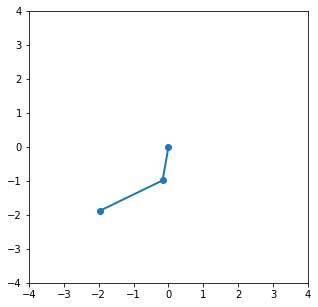

In [10]:
fig, ax = plt.subplots(figsize=(5, 5))
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
mass1, = ax.plot([], [], 'g.', markersize=15)
mass2, = ax.plot([], [], 'r.', markersize=20)
line, = ax.plot([], [], 'o-', lw=2)

def animate(i):
    mass1 = np.array([l1*np.sin(ans[i,0]),-l1*np.cos(ans[i,0])])
    mass2 = np.array([l2*np.sin(ans[i,1])+l1*np.sin(ans[i,0]), -l2*np.cos(ans[i,1])-l1*np.cos(ans[i,0])])
    line.set_data([0,mass1[0],mass2[0]],[0,mass1[1],mass2[1]])
    return line

anim = animation.FuncAnimation(fig, animate,frames=int(1000), repeat=False)
anim.save('dblpend.mp4', fps = 100)
plt.show

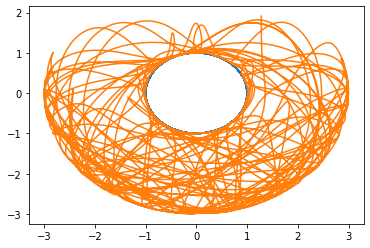

In [12]:
T=100
plt.plot(l1*np.sin(ans[:,0]), -l1*np.cos(ans[:,0]))
plt.plot(l2*np.sin(ans[:,1])+l1*np.sin(ans[:,0]), -l2*np.cos(ans[:,1])-l1*np.cos(ans[:,0]))

<function matplotlib.pyplot.show(close=None, block=None)>

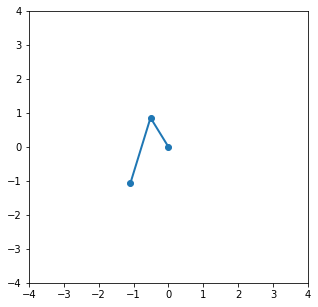

In [11]:
T=100
t = np.arange(0,T,0.01)
ans = odeint(rhs,y0,t)
fig, ax = plt.subplots(figsize=(5, 5))
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
mass1, = ax.plot([], [], 'g.', markersize=15)
mass2, = ax.plot([], [], 'r.', markersize=20)
line, = ax.plot([], [], 'o-', lw=2)
anim = animation.FuncAnimation(fig, animate,frames=int(10000), repeat=False)
anim.save('dblpend100.mp4', fps = 100)
plt.show